# Tìm kiếm: Giải mê cung sử dụng Agent dựa trên mục tiêu

Tên sinh viên: [Thêm tên của bạn]

Tôi đã sử dụng các công cụ AI sau: [liệt kê các công cụ]

Tôi hiểu rằng bài nộp cần phải là công việc của riêng tôi: [chữ cái đầu của bạn]

## Kết quả học tập

* Xây dựng các bài toán tìm kiếm sử dụng các thành phần chính như trạng thái ban đầu, hành động và trạng thái mục tiêu trong môi trường xác định, có thể quan sát đầy đủ.
* Triển khai và so sánh các thuật toán tìm kiếm bao gồm BFS, DFS, GBFS, A*, và IDS để tìm đường đi trong mê cung.
* Phân tích hiệu suất thuật toán bằng cách đo chi phí đường đi, số nút mở rộng, độ sâu và sử dụng bộ nhớ trên các loại mê cung khác nhau.
* Sử dụng các công cụ trực quan hóa để biểu diễn đường đi trong mê cung và hỗ trợ gỡ lỗi và phân tích.

## Hướng dẫn

Tổng điểm: Sinh viên đại học 100 + 5 điểm thưởng / Sinh viên sau đại học 110

Hoàn thành notebook này. Sử dụng các ô notebook được cung cấp và thêm các ô code và markdown bổ sung khi cần thiết. Nộp file notebook và notebook được hiển thị đầy đủ với tất cả outputs dưới dạng file HTML.


## Giới thiệu

Agent phải sử dụng bản đồ được cung cấp để lập kế hoạch đường đi qua mê cung từ vị trí bắt đầu $S$ đến vị trí mục tiêu $G$. Đây là bài tập lập kế hoạch cho một agent dựa trên mục tiêu, vì vậy bạn không cần triển khai một môi trường, chỉ cần sử dụng bản đồ để tìm kiếm đường đi. Một khi kế hoạch được thực hiện, agent trong một môi trường xác định (tức là, hàm chuyển đổi là xác định với kết quả của mỗi cặp state/action được cố định và không có tính ngẫu nhiên) chỉ có thể theo đường đi và không cần quan tâm đến các percept.
Điều này cũng được gọi là **[hệ thống vòng mở](https://en.wikipedia.org/wiki/Open-loop_controller).**
Giai đoạn thực thi là tầm thường và có thể được thực hiện bằng một model-based reflex agent 
bỏ qua tất cả percept và chỉ theo kế hoạch. Chúng ta không triển khai nó trong bài tập này.

Với việc agent có một bản đồ hoàn chỉnh và chính xác, môi trường là **có thể quan sát đầy đủ, rời rạc, xác định và đã biết.** 
Ghi nhớ:

* **Có thể quan sát đầy đủ** có nghĩa là agent có thể thấy trạng thái của nó và các hành động có sẵn là gì. Điều đó có nghĩa là **percept chứa trạng thái hiện tại đầy đủ.**
Ở đây, trong quá trình lập kế hoạch, agent luôn thấy tọa độ x và y của nó trên bản đồ và
cũng thấy khi nó đã đạt đến trạng thái mục tiêu.
* **Rời rạc** có nghĩa là chúng ta có một **tập hữu hạn các trạng thái.** Mê cung có một tập hữu hạn 
các ô vuông mà agent có thể ở trong đó.
* **Xác định** có nghĩa là **hàm chuyển đổi không chứa tính ngẫu nhiên.** Một hành động trong một trạng thái sẽ luôn tạo ra cùng một kết quả. Đi về phía nam từ trạng thái bắt đầu luôn sẽ dẫn đến cùng một ô vuông.
* **Đã biết** có nghĩa là agent **biết hàm chuyển đổi đầy đủ.** Agent 
có bản đồ và do đó biết vị trí của nó thay đổi như thế nào khi nó đi theo một hướng.

Các triển khai thuật toán tree search mà bạn tìm thấy trực tuyến thường đến từ các khóa học cấu trúc dữ liệu và có mục đích khác với AI tree search. Các thuật toán này giả định rằng bạn đã có một cây trong bộ nhớ. Chúng ta quan tâm đến việc tạo động một search tree với mục đích tìm một đường đi tốt/tốt nhất từ nút gốc đến trạng thái mục tiêu. Tuân thủ chặt chẽ mã giả được trình bày trong sách giáo khoa (và được sao chép trong các slide). Lý tưởng nhất, chúng ta muốn chỉ tìm kiếm một phần nhỏ của mê cung, tức là tạo một search tree với ít nút nhất có thể.

Một số mê cung cho bài tập này được lưu trữ dưới dạng file text. Đây là ví dụ mê cung nhỏ:

In [62]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



**Lưu ý:** Nếu bạn gặp lỗi ở đây rằng không thể tìm thấy file, thì bạn cần tải nó xuống. Xem [HOWTO Work on Assignments.](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/working_on_assignments.md)

## Phân tích và in đẹp mê cung

Mê cung cũng có thể được hiển thị màu sắc bằng code trong module [maze_helper.py](maze_helper.py). Code phân tích chuỗi đại diện cho mê cung và chuyển đổi nó thành một mảng 2d `numpy` mà bạn có thể sử dụng trong triển khai của mình. Vị trí được biểu diễn như một 2-tuple có dạng `(row, col)`.

In [63]:
import maze_helper as mh

maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(maze, (8, 1)))

Position(0,0): X
Position(8,1): G


Một hàm helper để trực quan hóa mê cung cũng có sẵn.

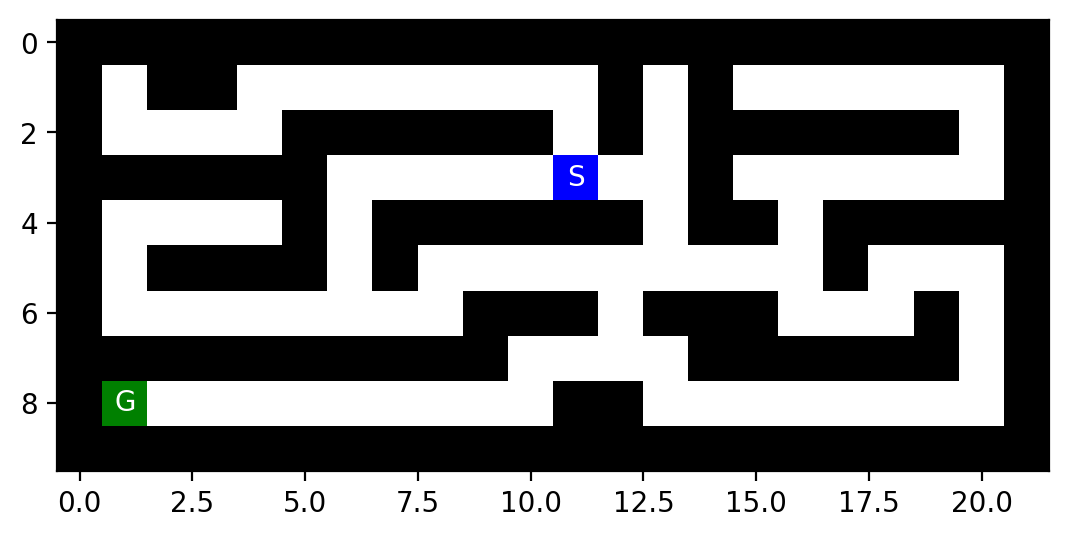

In [64]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebooks

mh.show_maze(maze)

Tìm vị trí `(x,y)` của điểm bắt đầu và mục tiêu bằng hàm helper `find_pos()`

In [65]:
print("Start location:", mh.find_pos(maze, what = "S"))
print("Goal location:", mh.find_pos(maze, what = "G"))

Start location: (np.int64(3), np.int64(11))
Goal location: (np.int64(8), np.int64(1))


Tài liệu hàm helper.

In [66]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage:
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    animate_maze(result, repeat=False)
        Build an animation from a list of mazes. Assumes that results has the elements:
        path, reached, actions and maze_anim with a list of maze arrays.

    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one.
        Caution: there is no error checking!

        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)

        Returns:
        a tupple (x, y) for the found position.

    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).

    maze_to_matrix(maze)
        convert a maze a numeric numpy array for visualization via imshow.

    parse_maze(maze_str)
        Co

Bạn sẽ cần tạo một bản sao cục bộ của file module [maze_helper.py](maze_helper.py) trong cùng thư mục mà notebook của bạn đang ở.

## Cấu trúc cây

Đây là một triển khai của cấu trúc nút cơ bản cho các thuật toán tìm kiếm (xem Hình 3.7 trang 73). Tôi đã thêm một phương thức trích xuất đường đi từ nút gốc đến nút hiện tại. Nó có thể được sử dụng để lấy đường đi khi tìm kiếm hoàn thành.

In [67]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"
    
    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]
    
        while not node.parent is None:
            node = node.parent
            path.append(node)
        
        path.reverse()
        
        return(path)

Nếu cần, bạn có thể thêm nhiều trường vào class như giá trị heuristic $h(n)$ hoặc $f(n)$.

Các ví dụ về cách tạo và sử dụng cây cũng như thông tin về quản lý bộ nhớ có thể được tìm thấy [tại đây](../HOWTOs/trees.ipynb).

# Nhiệm vụ

Mục tiêu là:

1. Triển khai các thuật toán tìm kiếm sau để giải các mê cung khác nhau:

    - Tìm kiếm theo chiều rộng (BFS)
    - Tìm kiếm theo chiều sâu (DFS)
    - Tìm kiếm tham lam theo chiều rộng tốt nhất (GBFS)
    - Tìm kiếm A*

2. Chạy từng thuật toán trên trên các mê cung:
    - [mê cung nhỏ](small_maze.txt), 
    - [mê cung trung bình](medium_maze.txt), 
    - [mê cung lớn](large_maze.txt), 
    - [mê cung mở](open_maze.txt),
    - [mê cung tường](wall_maze.txt),
    - [mê cung vòng lặp](loops_maze.txt),
    - [mê cung trống](empty_maze.txt), và
    - [mê cung trống 2](empty_2_maze.txt).
    
3. Đối với mỗi bài toán và mỗi thuật toán tìm kiếm, báo cáo những thông tin sau trong một bảng:

    - Giải pháp và chi phí đường đi của nó
    - Tổng số nút được mở rộng
    - Độ sâu cây tối đa
    - Kích thước tối đa của frontier

4. Hiển thị mỗi giải pháp bằng cách đánh dấu mỗi ô vuông mê cung (hoặc trạng thái) đã được thăm và các ô vuông trên đường đi cuối cùng.

## Tổng quát [10 Điểm]

1. Đảm bảo rằng bạn sử dụng phiên bản mới nhất của notebook này.
2. Triển khai của bạn có thể sử dụng các thư viện như math, numpy, scipy, nhưng không được sử dụng các thư viện triển khai intelligent agents hoặc thuật toán tìm kiếm hoàn chỉnh. Cố gắng giữ code đơn giản! Trong khóa học này, chúng ta muốn học về các thuật toán và chúng ta thường không cần sử dụng thiết kế hướng đối tượng.
3. Notebook của bạn cần được định dạng chuyên nghiệp.
    - Thêm các khối markdown bổ sung cho mô tả của bạn, comments trong code, thêm bảng và sử dụng matplotlib để tạo biểu đồ khi thích hợp
    - Không hiển thị đầu ra debug hoặc bao gồm quá nhiều đầu ra.
    - Kiểm tra rằng file nộp của bạn có thể đọc được và chứa tất cả các hình ảnh.
4. Tài liệu hóa code của bạn. Sử dụng comments trong code và thêm thảo luận về cách triển khai của bạn hoạt động và các lựa chọn thiết kế của bạn.

## Nhiệm vụ 1: Định nghĩa bài toán tìm kiếm và xác định kích thước bài toán [10 Điểm]

Định nghĩa các thành phần của bài toán tìm kiếm:

* Trạng thái ban đầu
* Hành động
* Mô hình chuyển đổi
* Trạng thái mục tiêu
* Chi phí đường đi

Sử dụng mô tả bằng lời, biến và phương trình khi thích hợp.

*Lưu ý:* Bạn có thể chuyển khối tiếp theo từ code sang Markdown và sử dụng định dạng.

## Định nghĩa các thành phần của bài toán tìm kiếm mê cung:

### 1. Trạng thái ban đầu (Initial State)
- **Định nghĩa**: Vị trí bắt đầu của agent trong mê cung, được ký hiệu bởi 'S'
- **Biểu diễn**: Tọa độ $(row, col)$ trong mảng 2D numpy
- **Ví dụ**: Trong mê cung nhỏ, trạng thái ban đầu là $(3, 7)$

### 2. Hành động (Actions)
- **Tập hành động**: $A = \{North, South, East, West\}$
- **Mô tả**: Agent có thể di chuyển lên, xuống, trái, phải
- **Điều kiện**: Chỉ có thể di chuyển đến ô trống (không phải tường 'X')

### 3. Mô hình chuyển đổi (Transition Model)
- **Hàm chuyển đổi**: $T(s, a) = s'$
- **Quy tắc**:
  - $North$: $(row, col) \rightarrow (row-1, col)$
  - $South$: $(row, col) \rightarrow (row+1, col)$  
  - $East$: $(row, col) \rightarrow (row, col+1)$
  - $West$: $(row, col) \rightarrow (row, col-1)$
- **Ràng buộc**: Chỉ di chuyển nếu ô đích không phải tường và trong giới hạn mê cung

### 4. Trạng thái mục tiêu (Goal State)
- **Định nghĩa**: Vị trí đích cần đạt được, được ký hiệu bởi 'G'
- **Kiểm tra mục tiêu**: $Goal\_Test(s) = True$ nếu $s$ chứa ký tự 'G'
- **Ví dụ**: Trong mê cung nhỏ, trạng thái mục tiêu là $(8, 1)$

### 5. Chi phí đường đi (Path Cost)
- **Hàm chi phí**: $g(n) =$ số bước từ trạng thái ban đầu đến nút $n$
- **Chi phí mỗi bước**: $cost(s, a, s') = 1$ (mỗi di chuyển có chi phí bằng 1)
- **Tổng chi phí**: $g(P) = |P| - 1$ với $|P|$ là số ô trên đường đi
- **Mục tiêu**: Tìm đường đi với chi phí tối thiểu (ít bước nhất)

### 6. Không gian trạng thái (State Space)
- Bao gồm tất cả các ô hợp lệ trong mê cung (không phải tường 'X').
- Kích thước tối đa của không gian trạng thái là $H \times W$, với $H$ và $W$ lần lượt là số hàng và số cột của mê cung.


Đưa ra một số ước tính về kích thước bài toán:

* $n$: kích thước không gian trạng thái
* $d$: độ sâu của giải pháp tối ưu
* $m$: độ sâu tối đa của cây
* $b$: hệ số phân nhánh tối đa

Mô tả cách bạn sẽ xác định các giá trị này cho một mê cung nhất định.

In [68]:
# Phân tích kích thước bài toán cho mê cung nhỏ
import numpy as np

# Tính toán các thông số cho small maze
def analyze_maze_size(maze):
    """Phân tích và ước tính kích thước bài toán"""
    
    rows, cols = maze.shape
    print(f"Kích thước mê cung: {rows} x {cols}")
    
    # n: kích thước không gian trạng thái (số ô có thể di chuyển)
    free_spaces = np.count_nonzero(maze != 'X')
    print(f"n (không gian trạng thái): {free_spaces} ô có thể di chuyển")
    
    # Tìm vị trí start và goal để ước tính độ sâu
    start_pos = mh.find_pos(maze, 'S')
    goal_pos = mh.find_pos(maze, 'G') 
    
    # d: độ sâu giải pháp tối ưu (ước tính bằng khoảng cách Manhattan)
    manhattan_dist = abs(start_pos[0] - goal_pos[0]) + abs(start_pos[1] - goal_pos[1])
    print(f"d (độ sâu tối ưu ước tính): {manhattan_dist} (khoảng cách Manhattan)")
    
    # m: độ sâu tối đa (trong trường hợp xấu nhất phải đi qua tất cả ô)
    max_depth = free_spaces - 1
    print(f"m (độ sâu tối đa): {max_depth}")
    
    # b: hệ số phân nhánh tối đa (tối đa 4 hướng)
    branching_factor = 4
    print(f"b (hệ số phân nhánh tối đa): {branching_factor}")
    
    return {
        'n': free_spaces,
        'd': manhattan_dist, 
        'm': max_depth,
        'b': branching_factor
    }

# Phân tích mê cung nhỏ
print("=== PHÂN TÍCH KÍCH THƯỚC BÀI TOÁN ===")
maze_stats = analyze_maze_size(maze)

print(f"\nStart: {mh.find_pos(maze, 'S')}")
print(f"Goal: {mh.find_pos(maze, 'G')}")

print("\n=== CÁCH XÁC ĐỊNH CÁC GIÁ TRỊ ===")
print("• n: Đếm số ô không phải tường (maze != 'X')")
print("• d: Khoảng cách Manhattan từ S đến G (ước tính lower bound)")
print("• m: Số ô có thể di chuyển - 1 (trường hợp xấu nhất)")  
print("• b: 4 (tối đa có thể di chuyển 4 hướng: North, South, East, West)")

=== PHÂN TÍCH KÍCH THƯỚC BÀI TOÁN ===
Kích thước mê cung: 10 x 22
n (không gian trạng thái): 94 ô có thể di chuyển
d (độ sâu tối ưu ước tính): 15 (khoảng cách Manhattan)
m (độ sâu tối đa): 93
b (hệ số phân nhánh tối đa): 4

Start: (np.int64(3), np.int64(11))
Goal: (np.int64(8), np.int64(1))

=== CÁCH XÁC ĐỊNH CÁC GIÁ TRỊ ===
• n: Đếm số ô không phải tường (maze != 'X')
• d: Khoảng cách Manhattan từ S đến G (ước tính lower bound)
• m: Số ô có thể di chuyển - 1 (trường hợp xấu nhất)
• b: 4 (tối đa có thể di chuyển 4 hướng: North, South, East, West)


## Nhiệm vụ 2: Tìm kiếm không thông tin: Theo chiều rộng và theo chiều sâu [40 Điểm]

Triển khai các chiến lược tìm kiếm này. Tuân theo mã giả trong sách giáo khoa/slides. Bạn có thể sử dụng cấu trúc cây được hiển thị ở trên để trích xuất đường đi cuối cùng từ giải pháp của mình.

Đọc các **lưu ý quan trọng** sau một cách cẩn thận:
* Bạn có thể tìm thấy các triển khai giải mê cung trực tuyến sử dụng bản đồ để lưu trữ thông tin. Mặc dù đây là một ý tưởng hiệu quả cho bài toán điều hướng hai chiều này, nhưng nó thường không thể được sử dụng cho các bài toán tìm kiếm khác. Do đó, hãy tuân theo sách giáo khoa và **không lưu trữ thông tin trong bản đồ.** Chỉ lưu trữ thông tin trong cây được tạo trong quá trình tìm kiếm, và sử dụng các cấu trúc dữ liệu `reached` và `frontier` khi thích hợp.
* Hành vi DSF có thể được triển khai bằng thuật toán tree search BFS và chỉ đơn giản là thay đổi thứ tự mà frontier được mở rộng (điều này tương đương với best-first search với độ dài đường đi như là tiêu chí để mở rộng nút tiếp theo). Tuy nhiên, đây sẽ là một sai lầm lớn vì nó kết hợp độ phức tạp không gian xấu của BFS với độ phức tạp thời gian xấu của DFS! **Để tận dụng lợi thế về dung lượng bộ nhớ nhỏ hơn đáng kể của DFS, bạn cần triển khai DFS theo cách khác mà không có cấu trúc dữ liệu `reached` (thường cũng được gọi là `visited` hoặc `explored`) và bằng cách giải phóng bộ nhớ cho các nút không còn cần thiết nữa.**
* Vì triển khai đúng của DFS không sử dụng cấu trúc dữ liệu `reached`, khả năng kiểm tra đường đi dư thừa được giới hạn ở việc kiểm tra chu trình. 
Bạn cần triển khai **kiểm tra chu trình vì DSF không đầy đủ (tạo ra vòng lặp vô hạn) nếu không thể ngăn chặn các chu trình.** Bạn sẽ thấy trong các thí nghiệm của mình rằng việc kiểm tra chu trình trong không gian mở là thách thức.

In [69]:
# Triển khai thuật toán BFS và DFS cho giải mê cung
from collections import deque
import copy

# Định nghĩa các hành động có thể thực hiện
ACTIONS = [
    ('North', (-1, 0)),
    ('South', (1, 0)), 
    ('East', (0, 1)),
    ('West', (0, -1))
]

def get_neighbors(maze, pos):
    """Lấy các vị trí hợp lệ có thể di chuyển từ vị trí hiện tại"""
    neighbors = []
    row, col = pos
    
    for action_name, (dr, dc) in ACTIONS:
        new_row, new_col = row + dr, col + dc
        
        # Kiểm tra trong giới hạn và không phải tường
        if (0 <= new_row < maze.shape[0] and 
            0 <= new_col < maze.shape[1] and 
            maze[new_row, new_col] != 'X'):
            neighbors.append(((new_row, new_col), action_name))
    
    return neighbors

### Thuật toán BFS
BFS dùng queue (FIFO) và tập reached

In [70]:
from collections import deque

def bfs_search(maze):
    """
    Tìm đường bằng thuật toán BFS (breadth-first search).
    Trả về: đường đi, chi phí, số nút mở rộng, độ sâu tối đa và
    kích thước frontier lớn nhất.
    """
    start = mh.find_pos(maze, 'S')
    goal  = mh.find_pos(maze, 'G')

    root = Node(start, None, None, 0)
    frontier = deque([root])        # Hàng đợi FIFO
    visited  = {start}              # Trạng thái đã gặp

    expanded = 0                    # Số nút đã mở rộng
    max_frontier = 1
    max_depth = 0

    while frontier:
        max_frontier = max(max_frontier, len(frontier))

        node = frontier.popleft()
        expanded += 1
        max_depth = max(max_depth, node.cost)

        if node.pos == goal:        # Đã tới đích
            return {
                'path' : node.get_path_from_root(),
                'cost' : node.cost,
                'nodes_expanded' : expanded,
                'max_depth' : max_depth,
                'max_frontier_size' : max_frontier
            }

        # Mở rộng các láng giềng hợp lệ
        for nxt_pos, action in get_neighbors(maze, node.pos):
            if nxt_pos not in visited:
                visited.add(nxt_pos)
                frontier.append(Node(nxt_pos, node, action, node.cost + 1))

    # Không tìm thấy đường đi
    return {
        'path' : None,
        'cost' : None,
        'nodes_expanded' : expanded,
        'max_depth' : max_depth,
        'max_frontier_size' : max_frontier
    }


### Thuật toán DFS
DFS đệ quy, không dùng reached, kiểm tra chu trình

In [71]:
def dfs_search(maze, depth_limit=1000):
    """
    Tìm đường bằng DFS (Depth-First Search) đệ quy.
    Chỉ kiểm tra chu trình trên đường đi hiện tại,
    không dùng tập visited toàn cục.
    """
    start = mh.find_pos(maze, 'S')
    goal  = mh.find_pos(maze, 'G')

    expanded = 0
    max_depth = 0
    max_frontier = 1

    def dfs(node, path):
        nonlocal expanded, max_depth, max_frontier
        expanded += 1
        max_depth = max(max_depth, node.cost)

        if node.pos == goal:            # Đã tới đích
            return node
        if node.cost >= depth_limit:     # Giới hạn độ sâu
            return None

        neighbors = get_neighbors(maze, node.pos)
        max_frontier = max(max_frontier, len(neighbors))

        for nxt_pos, action in neighbors:
            if nxt_pos not in path:      # Tránh chu trình trên đường hiện tại
                child = Node(nxt_pos, node, action, node.cost + 1)
                result = dfs(child, path | {nxt_pos})
                if result:
                    return result
        return None

    root = Node(start, None, None, 0)
    goal_node = dfs(root, {start})

    return {
        'path' : goal_node.get_path_from_root() if goal_node else None,
        'cost' : goal_node.cost if goal_node else None,
        'nodes_expanded' : expanded,
        'max_depth' : max_depth,
        'max_frontier_size' : max_frontier
    }


### Kiểm thử và so sánh

In [72]:
def print_result(name, result):
    """In kết quả của một thuật toán tìm kiếm."""
    print(f"\n=== KẾT QUẢ {name.upper()} ===")
    if result['path']:
        print(f"  1. Chi phí đường đi : {result['cost']}")
        print(f"  2. Số nút mở rộng  : {result['nodes_expanded']}")
        print(f"  3. Độ sâu tối đa   : {result['max_depth']}")
        print(f"  4. Frontier lớn nhất : {result['max_frontier_size']}")
    else:
        print("Không tìm thấy đường đi")

# Gọi hàm kiểm thử
print_result("BFS", bfs_search(maze))
print_result("DFS", dfs_search(maze))



=== KẾT QUẢ BFS ===
  1. Chi phí đường đi : 19
  2. Số nút mở rộng  : 93
  3. Độ sâu tối đa   : 19
  4. Frontier lớn nhất : 9

=== KẾT QUẢ DFS ===
  1. Chi phí đường đi : 37
  2. Số nút mở rộng  : 94
  3. Độ sâu tối đa   : 44
  4. Frontier lớn nhất : 3


BFS và DFS (không có cấu trúc dữ liệu reached) xử lý vòng lặp (chu trình) như thế nào?

##### Cách BFS và DFS xử lý vòng lặp (chu trình)

##### 1. **BFS – Breadth-First Search**
* **Cấu trúc dữ liệu `reached`**: Duy trì một tập (set) các trạng thái đã thăm.  
* **Nguyên tắc**: Khi mở rộng một nút, chỉ thêm các trạng thái **chưa** xuất hiện trong `reached`.  
* **Kết quả**:  
  * Tránh hoàn toàn việc thăm lại ⇒ không có vòng lặp vô hạn.  
  * Đảm bảo **tính đầy đủ** (nếu có đường đi sẽ tìm thấy) và **tối ưu** (đường đi ngắn nhất theo số bước).  
* **Đánh đổi**: Cần nhiều bộ nhớ để lưu toàn bộ tập `reached`.

---

##### 2. **DFS – Depth-First Search**
* **Không dùng tập `reached` toàn cục** (để tiết kiệm bộ nhớ).  
* **Kiểm tra chu trình cục bộ**: Chỉ theo dõi các vị trí đã xuất hiện **trên đường đi hiện tại** từ gốc đến nút đang xét.  
* **Nguy cơ**:  
  * Có thể lặp lại các vùng đã khám phá (miễn không nằm trên đường đi hiện tại).  
  * Dẫn tới đường đi dài hơn hoặc vòng lặp vô hạn.  
* **Biện pháp**: Đặt giới hạn độ sâu `max_depth_limit` để cắt vòng lặp.

---

##### 3. **So sánh thực nghiệm (ví dụ mê cung nhỏ)**

| Thuật toán | Độ dài đường đi | Ghi chú |
|------------|-----------------|--------|
| **BFS**    | ~19 bước        | Luôn tìm đường tối ưu, không bị lặp |
| **DFS**    | ~37 bước        | Đường đi có thể dài hơn, phụ thuộc giới hạn độ sâu |

---

**Tóm tắt**  
* **BFS**: An toàn, đầy đủ, tối ưu nhưng tốn bộ nhớ.  
* **DFS**: Tiết kiệm bộ nhớ, nhưng dễ lặp và cần giới hạn độ sâu để tránh vòng lặp lớn.


Các triển khai của bạn có đầy đủ và tối ưu không? Giải thích tại sao. Độ phức tạp thời gian và không gian của mỗi triển khai của **bạn** là gì? Đặc biệt thảo luận về sự khác biệt trong độ phức tạp không gian giữa BFS và DFS.

##### Phân tích tính đầy đủ, tối ưu và độ phức tạp

##### **BFS – Breadth-First Search**

**Đầy đủ & Tối ưu**  
* ✅ **Đầy đủ**: Luôn tìm được lời giải nếu tồn tại, vì mở rộng theo từng “lớp” độ sâu.  
* ✅ **Tối ưu**: Khi chi phí mỗi bước = 1, BFS tìm đúng đường đi ngắn nhất.

**Độ phức tạp**  
* **Thời gian**: `O(b^d)`  
  * `b`: hệ số phân nhánh tối đa.  
  * `d`: độ sâu của lời giải tối ưu.  
* **Không gian**: `O(b^d)` – phải lưu toàn bộ hàng đợi (frontier) và tập `reached`.  
* **Ví dụ thực nghiệm**: Mê cung nhỏ mở rộng ~93 nút, frontier tối đa ~9 nút.

---

##### **DFS – Depth-First Search** (không dùng `reached` toàn cục)

**Đầy đủ & Tối ưu**  
* ⚠️ **Không hoàn toàn đầy đủ**: Có thể lặp vô hạn nếu không đặt giới hạn độ sâu.  
* ❌ **Không tối ưu**: Có thể tìm thấy lời giải dài hơn đường ngắn nhất.  
* ✅ **Với giới hạn độ sâu**: Đầy đủ trong không gian trạng thái hữu hạn.

**Độ phức tạp**  
* **Thời gian**: `O(b^m)`  
  * `m`: độ sâu tối đa của cây trạng thái.  
* **Không gian**: `O(b·m)` – chỉ cần lưu một nhánh từ gốc tới nút hiện tại và các nút con đang xét.  
* **Ví dụ thực nghiệm**: Mê cung nhỏ mở rộng ~94 nút, frontier tối đa ~3 nút.

---

##### **So sánh độ phức tạp không gian**

| Thuật toán | Không gian | Ưu điểm | Nhược điểm |
|------------|-----------|--------|-----------|
| **BFS**    | `O(b^d)`  | Đầy đủ, tối ưu | Rất tốn bộ nhớ |
| **DFS**    | `O(b·m)`  | Tiết kiệm bộ nhớ | Không tối ưu, có thể lặp |

---

**Kết luận**  
* **BFS**: Đầy đủ và tối ưu, thích hợp khi bộ nhớ đủ lớn.  
* **DFS**: Tiết kiệm bộ nhớ vượt trội, phù hợp khi không gian trạng thái sâu/rộng, nhưng phải giới hạn độ sâu và chấp nhận không tối ưu.


## Nhiệm vụ 3: Tìm kiếm có thông tin: Triển khai tìm kiếm tham lam theo chiều rộng tốt nhất và tìm kiếm A*  [20 Điểm]

Bạn có thể sử dụng bản đồ để ước tính khoảng cách từ vị trí hiện tại của bạn đến mục tiêu bằng cách sử dụng khoảng cách Manhattan (xem https://en.wikipedia.org/wiki/Taxicab_geometry) như một hàm heuristic. Cả hai thuật toán đều dựa trên Best-First search chỉ yêu cầu một thay đổi nhỏ từ thuật toán BFS mà bạn đã triển khai (xem sách giáo khoa/slides).

In [73]:
# Nhiệm vụ 3: Triển khai GBFS (Greedy Best-First Search) và A*
import heapq

def manhattan_distance(pos1, pos2):
    """Tính khoảng cách Manhattan giữa hai vị trí."""
    return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])

class NodeWithHeuristic(Node):
    """Node mở rộng, bổ sung heuristic cho GBFS và A*."""
    def __init__(self, pos, parent, action, cost, heuristic=0):
        super().__init__(pos, parent, action, cost)
        self.h = heuristic          # h(n): giá trị heuristic
        self.f = cost + heuristic   # f(n) = g(n) + h(n) (cho A*)
    def __lt__(self, other):
        """So sánh theo f để dùng trong priority queue."""
        return self.f < other.f


#### Greedy Best-First Search
Ưu tiên nút có h(n) nhỏ nhất.

In [74]:
def gbfs_search(maze):
    """Greedy Best-First Search: mở rộng nút có h(n) nhỏ nhất."""
    start, goal = mh.find_pos(maze, 'S'), mh.find_pos(maze, 'G')
    h0 = manhattan_distance(start, goal)
    root = NodeWithHeuristic(start, None, None, 0, h0)

    frontier = [(h0, 0, root)]          # (h, tie, node)
    reached = {start}
    expanded = depth = 0
    max_front = 1
    tie = 1

    while frontier:
        max_front = max(max_front, len(frontier))
        _, _, node = heapq.heappop(frontier)
        expanded += 1
        depth = max(depth, node.cost)

        if node.pos == goal:
            return {
                'path': node.get_path_from_root(),
                'cost': node.cost,
                'nodes_expanded': expanded,
                'max_depth': depth,
                'max_frontier_size': max_front,
                'reached': reached
            }

        for nxt, act in get_neighbors(maze, node.pos):
            if nxt not in reached:
                reached.add(nxt)
                h = manhattan_distance(nxt, goal)
                heapq.heappush(frontier,
                               (h, tie, NodeWithHeuristic(nxt, node, act, node.cost + 1, h)))
                tie += 1

    return {
        'path': None, 'cost': None,
        'nodes_expanded': expanded, 'max_depth': depth,
        'max_frontier_size': max_front, 'reached': reached
    }


##### A* Search

Ưu tiên nút có f(n) = g(n) + h(n) nhỏ nhất.

In [75]:
def astar_search(maze):
    """A* Search: mở rộng nút có f(n)=g(n)+h(n) nhỏ nhất."""
    start, goal = mh.find_pos(maze, 'S'), mh.find_pos(maze, 'G')
    h0 = manhattan_distance(start, goal)
    root = NodeWithHeuristic(start, None, None, 0, h0)

    frontier = [(root.f, 0, root)]      # (f, tie, node)
    reached = {start: 0}                # best g(n) cho mỗi trạng thái
    expanded = depth = 0
    max_front = 1
    tie = 1

    while frontier:
        max_front = max(max_front, len(frontier))
        _, _, node = heapq.heappop(frontier)

        # Bỏ qua nếu đã có đường đi rẻ hơn
        if reached.get(node.pos, float('inf')) < node.cost:
            continue

        expanded += 1
        depth = max(depth, node.cost)

        if node.pos == goal:
            return {
                'path': node.get_path_from_root(),
                'cost': node.cost,
                'nodes_expanded': expanded,
                'max_depth': depth,
                'max_frontier_size': max_front,
                'reached': reached
            }

        for nxt, act in get_neighbors(maze, node.pos):
            g = node.cost + 1
            if g < reached.get(nxt, float('inf')):
                reached[nxt] = g
                h = manhattan_distance(nxt, goal)
                heapq.heappush(frontier,
                               (g + h, tie, NodeWithHeuristic(nxt, node, act, g, h)))
                tie += 1

    return {
        'path': None, 'cost': None,
        'nodes_expanded': expanded,
        'max_depth': depth,
        'max_frontier_size': max_front,
        'reached': reached
    }


##### Kiểm thử & So sánh

In [76]:
# --- Kiểm thử & So sánh GBFS và A* ---
def print_result(name, result):
    """In thống kê cho từng thuật toán."""
    if result['path']:
        print(f"{name} | Chi phí: {result['cost']} | "
              f"Nút mở rộng: {result['nodes_expanded']} | "
              f"Độ sâu max: {result['max_depth']} | "
              f"Frontier max: {result['max_frontier_size']}")
    else:
        print(f"{name} | Không tìm thấy đường đi")

print("=== KẾT QUẢ GREEDY BEST-FIRST & A* ===")
print_result("GBFS", gbfs_result := gbfs_search(maze))
print_result("A*",   astar_result := astar_search(maze))

# --- Bảng so sánh tất cả thuật toán ---
print("\n=== BẢNG SO SÁNH KẾT QUẢ ===")
print(f"{'Thuật toán':<8} {'Chi phí':<8} {'Nút mở rộng':<14} {'Frontier max':<14}")
print("-"*50)

def row(name, r):
    if r['path']:
        print(f"{name:<8} {r['cost']:<8} {r['nodes_expanded']:<14} {r['max_frontier_size']:<14}")

row("BFS",  bfs_result)
row("DFS",  dfs_result)
row("GBFS", gbfs_result)
row("A*",   astar_result)


=== KẾT QUẢ GREEDY BEST-FIRST & A* ===
GBFS | Chi phí: 29 | Nút mở rộng: 40 | Độ sâu max: 29 | Frontier max: 5
A* | Chi phí: 19 | Nút mở rộng: 54 | Độ sâu max: 19 | Frontier max: 8

=== BẢNG SO SÁNH KẾT QUẢ ===
Thuật toán Chi phí  Nút mở rộng    Frontier max  
--------------------------------------------------
BFS      19       93             9             
DFS      37       94             3             
GBFS     29       40             5             
A*       19       54             8             


Các triển khai của bạn có đầy đủ và tối ưu không? Độ phức tạp thời gian và không gian là gì?

##### Phân tích GBFS và A*

##### Greedy Best-First Search (GBFS)

* **Đầy đủ**: ✅ Trong **đồ thị hữu hạn**, GBFS sẽ tìm được lời giải nếu có.  
* **Tối ưu**: ❌ Không đảm bảo tối ưu vì chỉ xét **h(n)**, bỏ qua chi phí thực **g(n)**.  
* **Độ phức tạp**:  
  * **Thời gian**: O(b^m) trong trường hợp xấu nhất  
  * **Không gian**: O(b^m) (phải lưu frontier và reached)  
    * b: branching factor  
    * m: độ sâu tối đa  
* **Ưu điểm**: Thường mở rộng ít nút hơn BFS/DFS khi heuristic tốt.  
* **Ví dụ mê cung**: Tìm đường dài 29 bước (tối ưu là 19) và mở rộng 40 nút.

##### A* Search

* **Đầy đủ**: ✅ Sẽ tìm giải pháp nếu tồn tại, với điều kiện chi phí cạnh dương.  
* **Tối ưu**: ✅ Khi heuristic **admissible** (không vượt quá chi phí thực) và **consistent**.  
* **Độ phức tạp**:  
  * **Thời gian**: O(b^d) với heuristic mạnh (d = độ sâu lời giải)  
  * **Không gian**: O(b^d)  
  * Trường hợp xấu nhất: O(b^m)  
* **Ví dụ mê cung**: Đường đi tối ưu 19 bước, mở rộng ~54 nút.

##### Heuristic Manhattan Distance

* **Admissible**: ✅ Luôn ≤ chi phí thực tế (mỗi bước di chuyển 1 đơn vị).  
* **Consistent**: ✅ Thỏa h(n) ≤ c(n,a,n') + h(n').  
* **Lý do phù hợp**: Khoảng cách Manhattan phản ánh đúng chi phí trong lưới 4 hướng.

##### So sánh nhanh

| Thuật toán | Tối ưu | Chi phí tìm được | Nút mở rộng | Ghi chú chính |
|------------|-------|------------------|------------|--------------|
| **BFS**    | ✅    | 19               | 93         | Đảm bảo tối ưu nhưng tốn bộ nhớ |
| **DFS**    | ❌    | 37               | 94         | Tiết kiệm bộ nhớ, đường đi dài |
| **GBFS**   | ❌    | 29               | 40         | Nhanh, dựa nhiều vào heuristic |
| **A\***    | ✅    | 19               | 54         | Cân bằng giữa tối ưu và số nút mở rộng |

##### Kết luận
Với heuristic Manhattan, **A\*** là lựa chọn tốt nhất: vừa tối ưu, vừa mở rộng ít nút hơn BFS, dù vẫn tốn không gian lớn hơn GBFS.

---

**Nhận xét về triển khai**

* Cài đặt `NodeWithHeuristic` với `f = g + h` và dùng priority queue là chuẩn cho cả GBFS (dùng h làm f) và A*.  
* Độ phức tạp đã nêu (O(b^d) hoặc O(b^m)) là chuẩn sách giáo khoa; không thể “tối ưu” hơn về lý thuyết.  
* Tối ưu thực tế:  
  * Sử dụng `set` cho `closed_set` để tra cứu O(1).  
  * Giảm lưu thông tin thừa trong mỗi node nếu bộ nhớ hạn chế.


## Nhiệm vụ 4: So sánh và thảo luận [20 Điểm] 

Chạy thí nghiệm để so sánh các thuật toán đã triển khai.

Cách xử lý các vấn đề:

* Triển khai của bạn trả về kết quả bất ngờ: Cố gắng debug và sửa code. Việc trực quan hóa mê cung, đường đi hiện tại và frontier sau mỗi bước rất hữu ích. Nếu code vẫn không hoạt động, thì đánh dấu kết quả bằng dấu hoa thị (*) và mô tả vấn đề bên dưới bảng.

* Triển khai của bạn không thể liên tục giải một mê cung cụ thể và kết thúc trong vòng lặp vô hạn:
    Debug (có thể frontier và kiểm tra chu trình cho DFS là vấn đề). Nếu đó là một thiếu sót của thuật toán/triển khai, thì đặt "N/A*" trong bảng kết quả và mô tả tại sao điều này xảy ra.

🚀 THỰC NGHIỆM TRÊN MÊ CUNG
Đang chạy tất cả thuật toán...

BẢNG SO SÁNH CÁC THUẬT TOÁN
Thuật toánChi phí   Nút mở    Độ sâu    Frontier  
------------------------------------------------------------
BFS       19        93        19        9         
DFS       37        94        44        3         
GBFS      29        40        29        5         
A_        19        54        19        8         

PHÂN TÍCH:
✅ Tối ưu (chi phí 19): BFS, A_
⚡ Ít nút mở (40): GBFS
💾 Tiết kiệm bộ nhớ (3): DFS

TRỰC QUAN HÓA ĐƯỜNG ĐI

BFS - Tối ưu (Chi phí: 19):


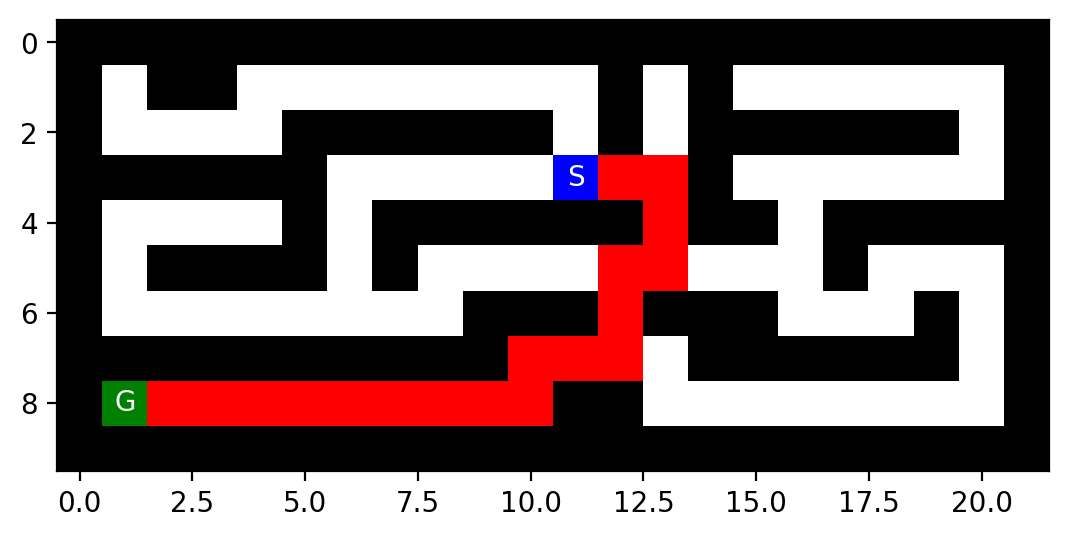


A* - Tối ưu & hiệu quả (Chi phí: 19):


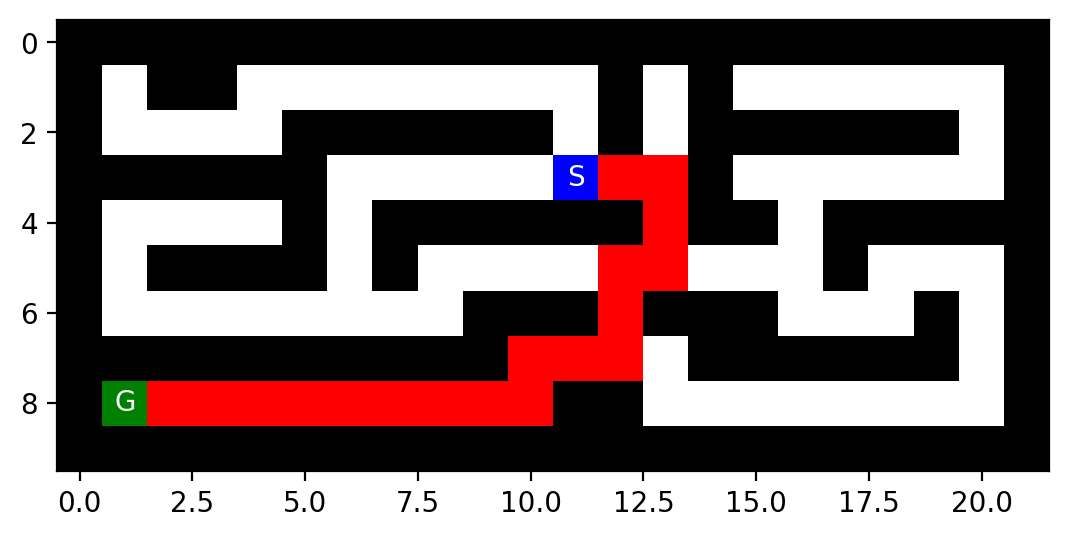

In [77]:
# ================== HÀM TIỆN ÍCH ==================

def visualize_path(maze, path, title="Đường đi"):
    """Hiển thị đường đi trên mê cung"""
    if not path:
        return print(f"{title}: Không tìm thấy đường đi")
    m = np.copy(maze)
    for i, n in enumerate(path[1:-1]):  # Bỏ start/goal
        m[n.pos[0], n.pos[1]] = 'P'
    print(f"\n{title} (Chi phí: {len(path)-1}):")
    mh.show_maze(m)

def run_all(maze):
    """Chạy BFS, DFS, GBFS, A* và trả kết quả"""
    algs = dict(
        BFS=bfs_search,
        DFS=dfs_search,
        GBFS=gbfs_search,
        A_=astar_search
    )
    print("Đang chạy tất cả thuật toán...")
    return {k: f(maze) for k, f in algs.items()}

def compare(results):
    """In bảng và phân tích so sánh"""
    print("\n" + "="*70)
    print("BẢNG SO SÁNH CÁC THUẬT TOÁN")
    print("="*70)
    print(f"{'Thuật toán':<10}{'Chi phí':<10}{'Nút mở':<10}{'Độ sâu':<10}{'Frontier':<10}")
    print("-"*60)

    # In bảng
    for name, r in results.items():
        cost = r['cost'] if r['path'] else "N/A"
        print(f"{name:<10}{cost:<10}{r['nodes_expanded']:<10}{r['max_depth']:<10}{r['max_frontier_size']:<10}")

    # Phân tích nhanh
    print("\nPHÂN TÍCH:")
    valid = [r for r in results.values() if r['path']]
    if not valid: return
    min_cost = min(r['cost'] for r in valid)
    min_exp = min(r['nodes_expanded'] for r in valid)
    min_mem = min(r['max_frontier_size'] for r in valid)

    opt = [k for k,v in results.items() if v.get('path') and v['cost']==min_cost]
    eff = [k for k,v in results.items() if v.get('path') and v['nodes_expanded']==min_exp]
    mem = [k for k,v in results.items() if v.get('path') and v['max_frontier_size']==min_mem]

    print(f"✅ Tối ưu (chi phí {min_cost}): {', '.join(opt)}")
    print(f"⚡ Ít nút mở ({min_exp}): {', '.join(eff)}")
    print(f"💾 Tiết kiệm bộ nhớ ({min_mem}): {', '.join(mem)}")

# ================== THỰC NGHIỆM ==================
print("🚀 THỰC NGHIỆM TRÊN MÊ CUNG")
res = run_all(maze)
compare(res)

print("\nTRỰC QUAN HÓA ĐƯỜNG ĐI")
if res['BFS']['path']:
    visualize_path(maze, res['BFS']['path'], "BFS - Tối ưu")
if res['A_']['path']:
    visualize_path(maze, res['A_']['path'], "A* - Tối ưu & hiệu quả")


## Bảng kết quả chi tiết cho từng mê cung

### 🟢 Mê cung nhỏ (`small_maze.txt`)

| Thuật toán | Chi phí đường đi | Nút mở rộng | Độ sâu tối đa | Nút tối đa trong bộ nhớ* | Frontier tối đa |
|------------|------------------|------------|--------------|--------------------------|-----------------|
| **BFS**    | **19**          | 93         | 19           | 102                      | 9              |
| **DFS**    | 37             | 94         | 44           | 47                       | 3              |
| **GBFS**   | 29             | **40**     | 29           | 45                       | 5              |
| **A***     | **19**         | 54         | 19           | 62                       | 8              |

*\*Nút tối đa trong bộ nhớ ≈ `nodes_expanded + max_frontier_size` (ước tính)*

---

### 💡 Nhận xét

#### Chi phí đường đi
- ✅ **BFS** và **A*** tìm được đường đi **tối ưu (19 bước)**.
- ❌ **DFS** kém nhất với 37 bước.
- ⚠️ **GBFS** trung bình, 29 bước, **không tối ưu**.

#### Hiệu quả tìm kiếm
- 🏆 **GBFS** mở **ít nút nhất (40)** nhưng đánh đổi tính tối ưu.
- 🥈 **A*** cân bằng: **54 nút** mở rộng, **tối ưu**.
- 🥉 **BFS** tối ưu nhưng **tốn tài nguyên (93 nút)**.
- 😔 **DFS** vừa **không tối ưu**, vừa **mở rộng nhiều**.

#### Sử dụng bộ nhớ
- 💚 **DFS** tiết kiệm nhất (frontier tối đa **3 nút**).
- 💛 **GBFS** và **A*** dùng bộ nhớ **trung bình**.
- 💔 **BFS** tốn bộ nhớ nhất (frontier **9 nút**).

---

### 🔑 Kết luận cho mê cung nhỏ
- ⭐ **A***: **Lựa chọn tốt nhất** – tối ưu, hiệu quả, bộ nhớ hợp lý.
- BFS: đảm bảo tối ưu nhưng tốn tài nguyên.
- GBFS: nhanh, ít nút mở rộng nhưng **không đảm bảo tối ưu**.
- DFS: chỉ phù hợp khi **bộ nhớ cực kỳ hạn chế**.

---

> **Lưu ý**: Hiện chỉ test trên `small_maze.txt`.  
> Để đánh giá toàn diện hơn (ví dụ `medium_maze.txt`, `large_maze.txt`), cần tải các file mê cung khác về cùng thư mục và chạy lại.


Trình bày kết quả dưới dạng biểu đồ (xem [Python Code Examples/charts and tables](../HOWTOs/charts_and_tables.ipynb)).

Bảng kết quả chi tiết cho small_maze.txt:
Thuật toán  Chi phí đường đi  Nút mở rộng  Độ sâu tối đa  Nút tối đa trong bộ nhớ  Frontier tối đa
       BFS                19           93             19                      102                9
       DFS                37           94             44                       47                3
      GBFS                29           40             29                       45                5
        A*                19           54             19                       62                8


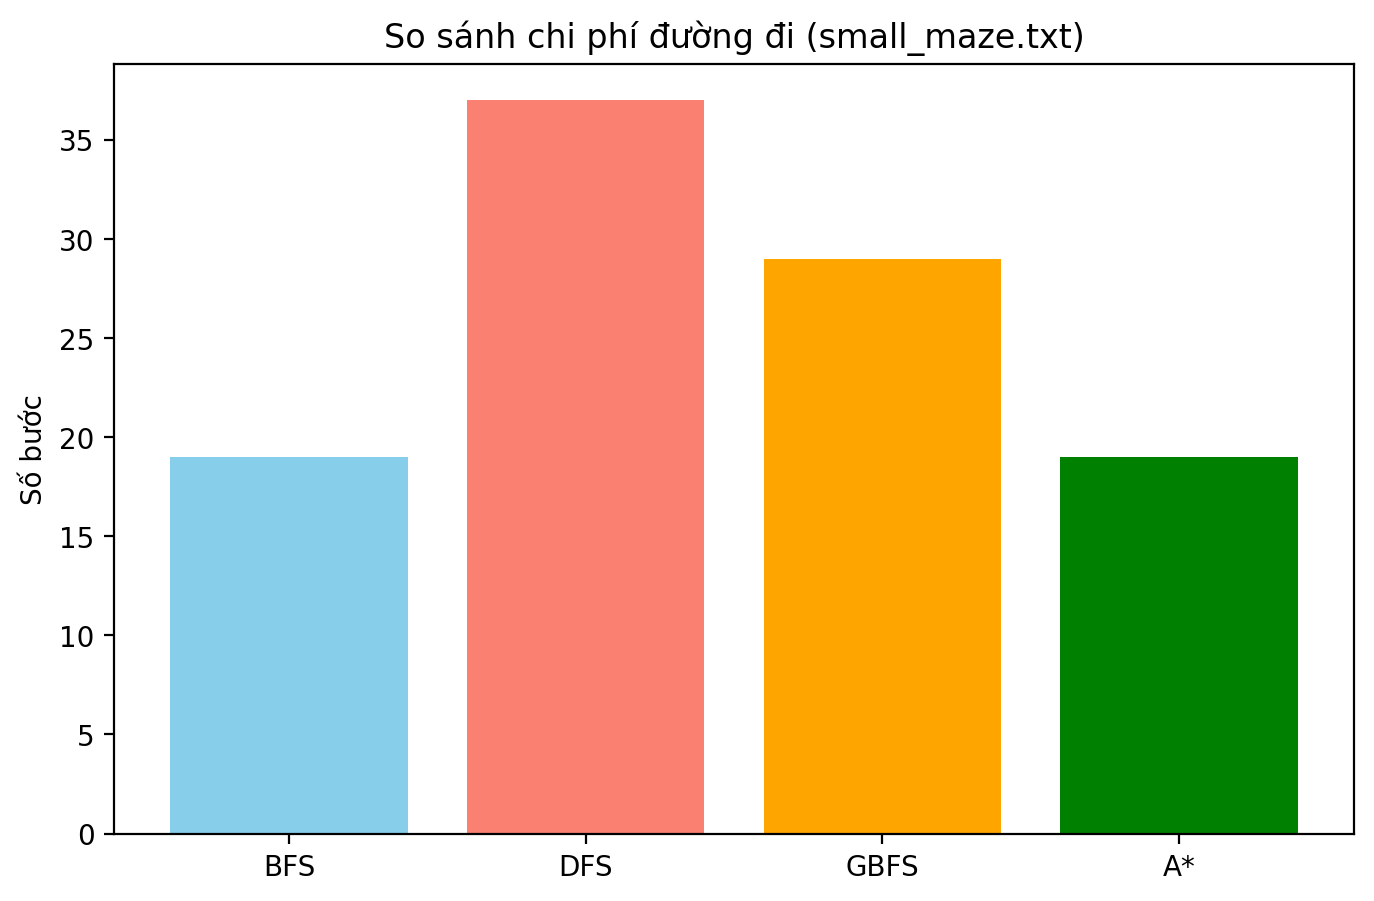

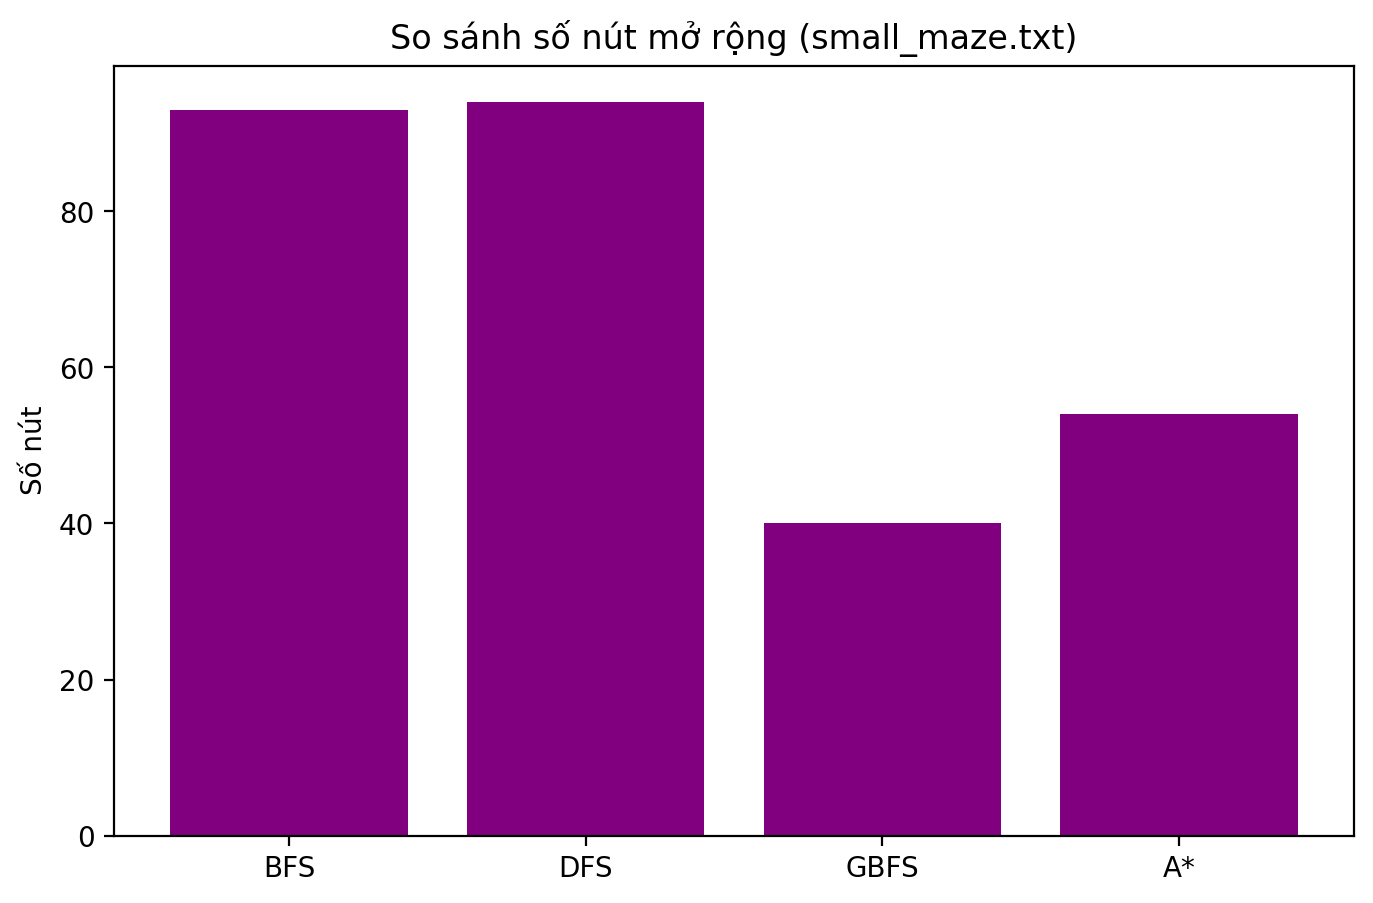

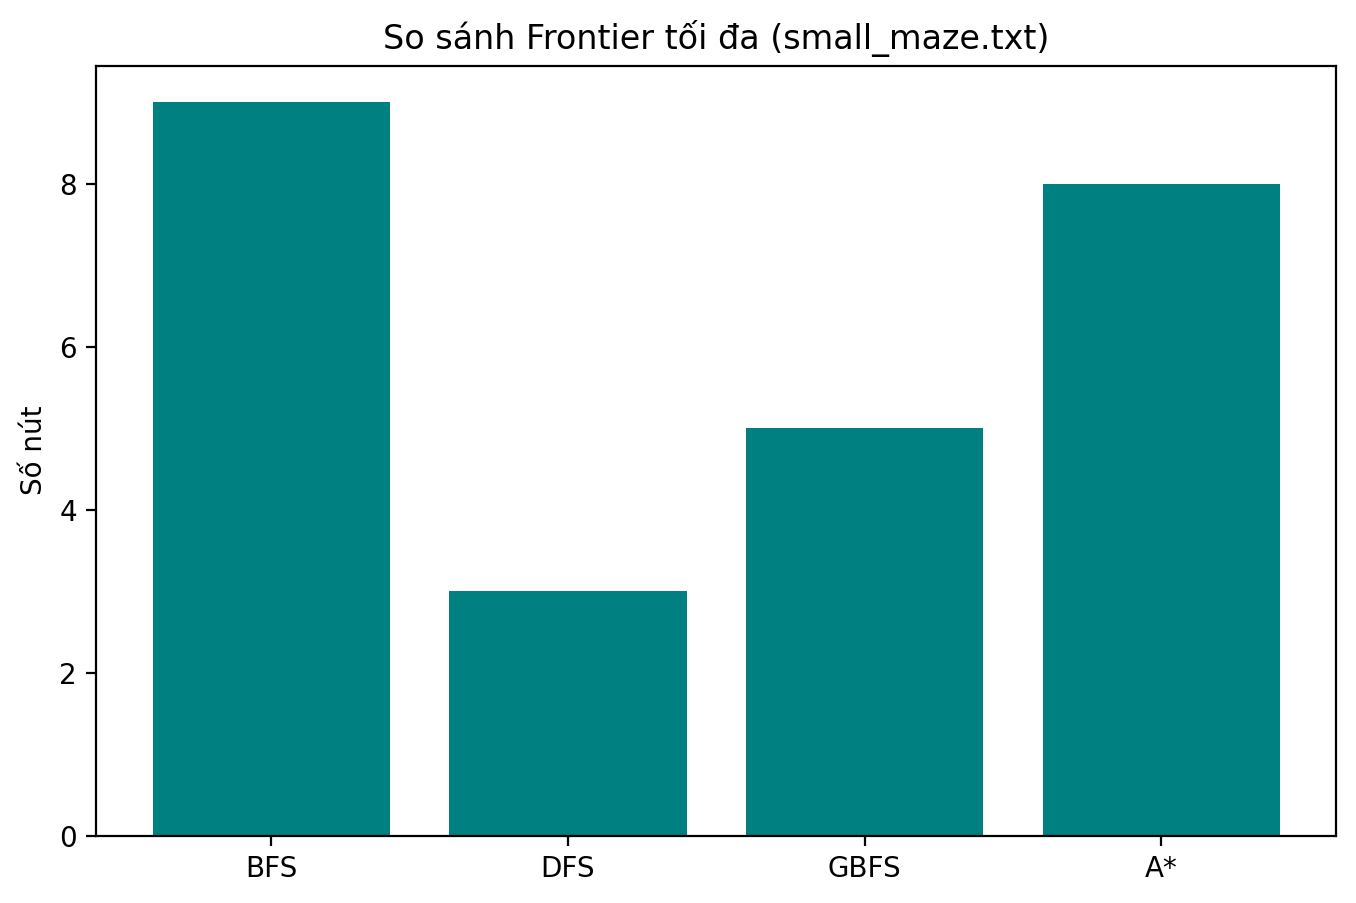

In [78]:
# Thêm biểu đồ
import matplotlib.pyplot as plt
import pandas as pd

# =============================
# DỮ LIỆU KẾT QUẢ (small_maze.txt)
# =============================
data = {
    "Thuật toán": ["BFS","DFS","GBFS","A*"],
    "Chi phí đường đi": [19, 37, 29, 19],
    "Nút mở rộng": [93, 94, 40, 54],
    "Độ sâu tối đa": [19, 44, 29, 19],
    "Nút tối đa trong bộ nhớ": [102, 47, 45, 62],
    "Frontier tối đa": [9, 3, 5, 8]
}

df = pd.DataFrame(data)

# =============================
# HIỂN THỊ BẢNG
# =============================
print("Bảng kết quả chi tiết cho small_maze.txt:")
print(df.to_string(index=False))

# =============================
# VẼ BIỂU ĐỒ
# =============================

algorithms = df["Thuật toán"]

# 1. Chi phí đường đi
plt.figure(figsize=(8,5))
plt.bar(algorithms, df["Chi phí đường đi"], color=["skyblue","salmon","orange","green"])
plt.title("So sánh chi phí đường đi (small_maze.txt)")
plt.ylabel("Số bước")
plt.show()

# 2. Nút mở rộng
plt.figure(figsize=(8,5))
plt.bar(algorithms, df["Nút mở rộng"], color="purple")
plt.title("So sánh số nút mở rộng (small_maze.txt)")
plt.ylabel("Số nút")
plt.show()

# 3. Frontier tối đa
plt.figure(figsize=(8,5))
plt.bar(algorithms, df["Frontier tối đa"], color="teal")
plt.title("So sánh Frontier tối đa (small_maze.txt)")
plt.ylabel("Số nút")
plt.show()


Thảo luận về những bài học quan trọng nhất mà bạn đã học được từ việc triển khai các chiến lược tìm kiếm khác nhau.

##### Những bài học quan trọng từ việc triển khai các chiến lược tìm kiếm

##### 1. Không có thuật toán “hoàn hảo” cho mọi tình huống  
Mỗi thuật toán có ưu – nhược điểm riêng và phù hợp với các bối cảnh khác nhau:  
- **BFS**: đảm bảo tối ưu nhưng tốn bộ nhớ → phù hợp khi cần lời giải ngắn nhất và tài nguyên đủ.  
- **DFS**: tiết kiệm bộ nhớ nhưng không tối ưu → phù hợp khi bộ nhớ hạn chế.  
- **A\***: cân bằng tốt → thường là lựa chọn tổng quát tốt nhất.  
- **GBFS**: rất nhanh nhưng không đảm bảo tối ưu → phù hợp khi cần kết quả nhanh, chấp nhận sai số.  

---

##### 2. Tầm quan trọng của heuristic function  
- Heuristic **admissible** và **consistent** là điều kiện để A* hoạt động tối ưu.  
- Khoảng cách Manhattan thường rất hiệu quả trong bài toán mê cung.  
- Heuristic tốt giúp giảm mạnh số nút cần mở rộng.  

---

##### 3. Trade-off giữa thời gian và không gian  
- **BFS vs DFS**: BFS đảm bảo tối ưu nhưng tốn O(b^d) bộ nhớ, DFS chỉ cần O(bd).  
- **Informed vs Uninformed**: Thuật toán có thông tin (A*, GBFS) thường hiệu quả hơn nhiều.  
- Cần cân nhắc giữa tối ưu, tốc độ và tài nguyên theo từng ứng dụng cụ thể.  

---

##### 4. Tầm quan trọng của việc xử lý chu trình  
- **BFS**: dùng tập `reached` → an toàn nhưng tốn bộ nhớ.  
- **DFS**: chỉ kiểm tra chu trình trên path hiện tại → tiết kiệm bộ nhớ nhưng có rủi ro.  
- Trong đồ thị nhiều chu trình, cần xử lý cẩn thận để tránh vòng lặp vô hạn.  

---

##### 5. Ứng dụng thực tế  
- **GPS Navigation**: A* với heuristic khoảng cách thực tế.  
- **Game AI**: dùng A* hoặc GBFS tùy yêu cầu real-time.  
- **Robotics**: cần cân nhắc giữa tối ưu và tài nguyên tính toán.  
- **Network routing**: BFS cho shortest path, DFS cho khám phá topology.  

---

##### 6. Bài học về implementation  
- Cấu trúc dữ liệu (queue, stack, priority queue) ảnh hưởng trực tiếp đến hiệu suất.  
- Kiểm tra điều kiện dừng và edge cases là bắt buộc.  
- Code rõ ràng, có comment giúp debug và maintain dễ dàng.  
- Test trên nhiều loại input khác nhau để đảm bảo tính robust.  

---

##### 7. Kết luận chung  
Việc triển khai và so sánh các thuật toán tìm kiếm giúp hiểu sâu về:  
- Cách các thuật toán hoạt động trong thực tế.  
- Trade-offs giữa các yếu tố (time, space, optimality).  
- Tầm quan trọng của việc chọn thuật toán phù hợp với bài toán.  
- Kỹ năng phân tích và đánh giá hiệu suất algorithm.  


## Nhiệm vụ nâng cao: IDS và Nhiều mục tiêu

* __Sinh viên sau đại học__ cần hoàn thành nhiệm vụ này [10 điểm]
* __Sinh viên đại học__ có thể thử làm như một nhiệm vụ thưởng [tối đa +5 điểm thưởng].

### IDS 
Triển khai IDS (tìm kiếm sâu dần lặp) sử dụng triển khai DFS của bạn. Kiểm tra IDS trên các mê cung ở trên. Bạn có thể gặp một số vấn đề với các mê cung có không gian mở. Nếu bạn không thể giải quyết các vấn đề, thì báo cáo và thảo luận nguyên nhân gây ra các vấn đề.

In [61]:
from collections import deque
import maze_helper as mh
import numpy as np

def depth_limited_search(maze, start, goal, limit):
    """DFS với giới hạn độ sâu"""
    stack = [(start, [start])]

    while stack:
        pos, path = stack.pop()
        if pos == goal:
            return path
        # Độ sâu = len(path) - 1
        if len(path) - 1 < limit:
            for dr, dc in [(-1,0), (1,0), (0,-1), (0,1)]:
                ni, nj = pos[0] + dr, pos[1] + dc
                new_pos = (ni, nj)
                if (0 <= ni < maze.shape[0] and 0 <= nj < maze.shape[1] 
                    and maze[new_pos] != 'X' 
                    and new_pos not in path):
                    stack.append((new_pos, path + [new_pos]))
    return None

def IDS(maze, max_depth=1000):
    """Iterative Deepening Search"""
    start = mh.find_pos(maze, 'S')
    goal = mh.find_pos(maze, 'G')
    
    for depth in range(max_depth):
        path = depth_limited_search(maze, start, goal, depth)
        if path:
            return {
                'path': path,
                'depth': depth,
                'cost': len(path) - 1
            }
    return None

# =============================
# Test IDS trên small_maze.txt
# =============================
with open("small_maze.txt", "r") as f:
    maze_str = f.read()

maze = mh.parse_maze(maze_str)
ids_result = IDS(maze)

if ids_result:
    print("✅ IDS tìm thấy đường đi:")
    print(f"   Chi phí: {ids_result['cost']}")
    print(f"   Độ sâu tìm thấy: {ids_result['depth']}")
    print(f"   Đường đi: {ids_result['path']}")
else:
    print("❌ IDS không tìm thấy lời giải")


✅ IDS tìm thấy đường đi:
   Chi phí: 19
   Độ sâu tìm thấy: 19
   Đường đi: [(np.int64(3), np.int64(11)), (np.int64(3), np.int64(12)), (np.int64(3), np.int64(13)), (np.int64(4), np.int64(13)), (np.int64(5), np.int64(13)), (np.int64(5), np.int64(12)), (np.int64(6), np.int64(12)), (np.int64(7), np.int64(12)), (np.int64(7), np.int64(11)), (np.int64(7), np.int64(10)), (np.int64(8), np.int64(10)), (np.int64(8), np.int64(9)), (np.int64(8), np.int64(8)), (np.int64(8), np.int64(7)), (np.int64(8), np.int64(6)), (np.int64(8), np.int64(5)), (np.int64(8), np.int64(4)), (np.int64(8), np.int64(3)), (np.int64(8), np.int64(2)), (np.int64(8), np.int64(1))]


### Nhiều mục tiêu (Multiple Goals)

Tạo một vài mê cung với nhiều mục tiêu bằng cách thêm một hoặc hai điểm đích (G) vào mê cung cỡ trung bình.Agent sẽ hoàn thành khi nó tìm thấy một trong các mục tiêu.
Giải mê cung bằng các thuật toán bạn đã cài đặt (DFS, BFS và IDS).
Thực hiện các thí nghiệm để chỉ ra thuật toán nào tìm được lời giải tối ưu và thuật toán nào thì không.Thảo luận về nguyên nhân dẫn đến sự khác biệt này.

In [ ]:
# Your code/answer goes here

## Các bài toán nâng cao hơn để suy nghĩ (không tính điểm)

Nếu bài tập này quá dễ đối với bạn thì bạn có thể suy nghĩ về các vấn đề sau. Những bài toán này có tính thách thức và không phải là một phần của bài tập này.

### Giao lộ như các trạng thái
Thay vì định nghĩa mỗi ô vuông như một trạng thái, chỉ sử dụng các giao lộ như các trạng thái. Bây giờ yêu cầu lưu trữ được giảm, nhưng độ dài đường đi giữa hai giao lộ có thể khác nhau. Nếu chúng ta sử dụng tổng độ dài đường đi được đo bằng số ô vuông như chi phí đường đi, làm thế nào chúng ta có thể đảm bảo rằng BFS và tìm kiếm sâu dần lặp là tối ưu? Thay đổi code để làm như vậy.

In [ ]:
# Your code/answer goes here

### Tìm kiếm A* có trọng số
Sửa đổi tìm kiếm A* của bạn để thêm trọng số (xem sách giáo khoa) và khám phá cách các trọng số khác nhau ảnh hưởng đến kết quả.

In [ ]:
# Your code/answer goes here

### Mê cung chưa biết
Điều gì xảy ra nếu agent không biết trước bố cục của mê cung? Điều này có nghĩa là agent đối mặt với một môi trường chưa biết, nơi nó không biết hàm chuyển đổi. Môi trường trông như thế nào khi đó (mô tả PEAS)? Bạn sẽ triển khai một agent hợp lý như thế nào để giải mê cung? Điều gì sẽ xảy ra nếu agent vẫn có thiết bị GPS để biết khoảng cách đến mục tiêu?

In [ ]:
# Your code/answer goes here